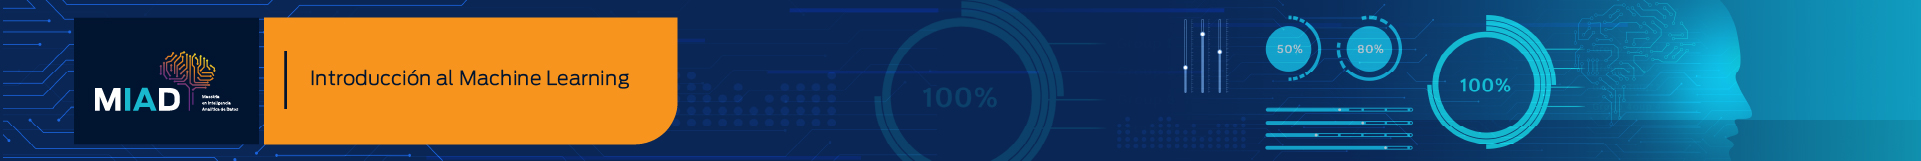

# Introducción al Machine Learning - Semana 7
## Caso: Implementación de metodologías de máquinas de soporte vectorial, el uso de kernels y selección de variables

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar máquinas de soporte vectorial y la implementación de metodologías de selección de variables. Con respecto a las máquinas de soporte vectorial, estas deberán implementarse de tres maneras:sin kernel, con kernel polinomial y con kernel radial.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Los procedimientos en este notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

2. Para su calificación deberá subirse únicamente este mismo archivo en formato HTML.

3. El archivo debe poder ejecutarse localmente cuando sea descargado, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios de evaluación

Los criterios que se evaluarán son: 

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [5 puntos] 

Estimación de modelo SVM de clasificación: Se estima un modelo SVM de clasificación, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [10 puntos] 

Selección de variables usando métodos de envoltura e implementación de modelo de clasificación: Se estima un modelo SVM con las variables seleccionadas usando un método de envoltura, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Selección de variables usando métodos de filtro e implementación de modelo de clasificación: Se estima un modelo SVM con las variables seleccionadas usando un método de filtro, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación de modelo SVM de clasificación con kernel polinomial: Se estima un modelo SVM de clasificación con kernel polinomial, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación de modelo SVM de clasificación con kernel radial: Se estima un modelo SVM de clasificación con kernel radial, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [5 puntos] 

### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Hitters", la cual contiene 20 variables de jugadores de la Major League Baseball en las temporadas de 1986 y 1987. 

De esta manera, el objetivo de la actividad es predecir si el salario de un jugador es mayor a 425 utiilzando las características que describen las variables predictivas.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-hitters

Finalmente, para resolver los puntos de esta actividad deberán tener en cuenta únicamente las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.

### 1. Análisis preliminar de variables (5 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [1]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

In [2]:
#Lectura de archivo fuente
df = pd.read_csv('./dataset-87300.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
#Dimensiones originales de dataset
df.shape

(322, 20)

In [4]:
#Variables de dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    obje

In [5]:
#Eliminación de variables categóricas
df.drop(['League', 'Division', 'NewLeague'], axis=1, inplace=True)

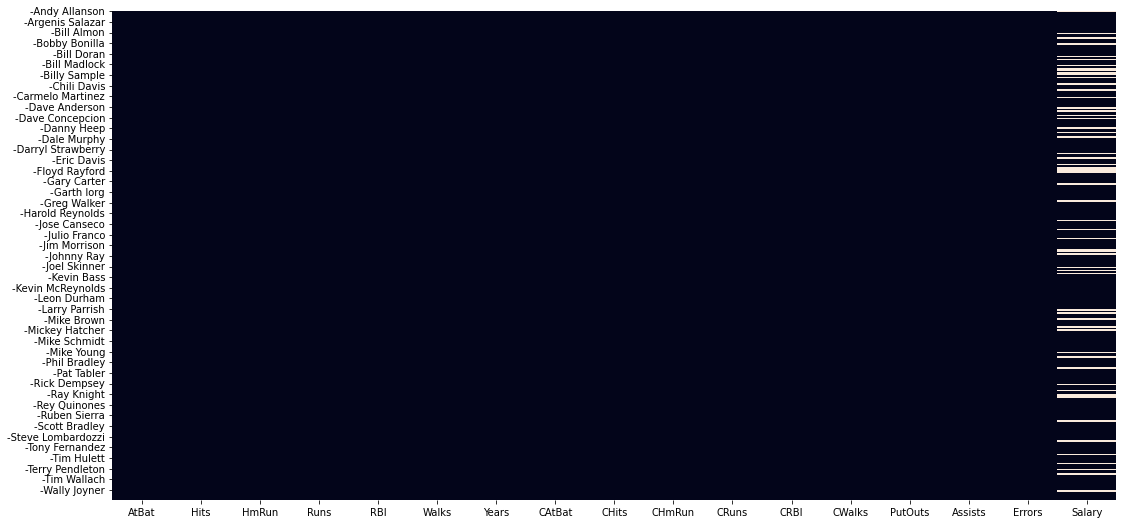

In [6]:
#Vistazo general de datos faltantes
plt.figure(figsize=(18, 9))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [7]:
#Eliminando observaciones con datos faltantes
df.dropna(how='any', axis=0, inplace=True)

#Dimensiones de dataset post cambios
df.shape

(263, 17)

In [8]:
#Estadísticas descriptivas
for i, col in enumerate(df.columns):
    print(df[col].describe(), '\n')

count    263.000000
mean     403.642586
std      147.307209
min       19.000000
25%      282.500000
50%      413.000000
75%      526.000000
max      687.000000
Name: AtBat, dtype: float64 

count    263.000000
mean     107.828897
std       45.125326
min        1.000000
25%       71.500000
50%      103.000000
75%      141.500000
max      238.000000
Name: Hits, dtype: float64 

count    263.000000
mean      11.619772
std        8.757108
min        0.000000
25%        5.000000
50%        9.000000
75%       18.000000
max       40.000000
Name: HmRun, dtype: float64 

count    263.000000
mean      54.745247
std       25.539816
min        0.000000
25%       33.500000
50%       52.000000
75%       73.000000
max      130.000000
Name: Runs, dtype: float64 

count    263.000000
mean      51.486692
std       25.882714
min        0.000000
25%       30.000000
50%       47.000000
75%       71.000000
max      121.000000
Name: RBI, dtype: float64 

count    263.000000
mean      41.114068
std       21.7

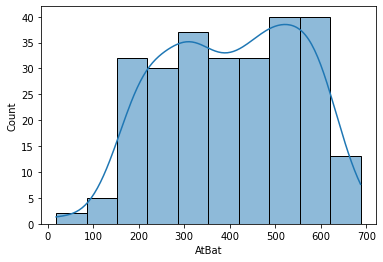

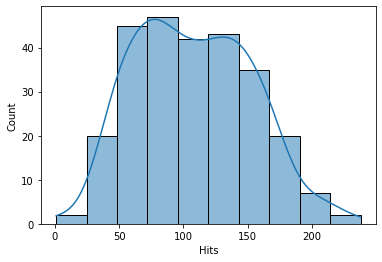

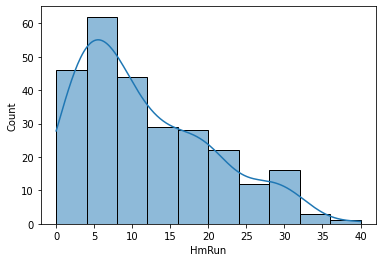

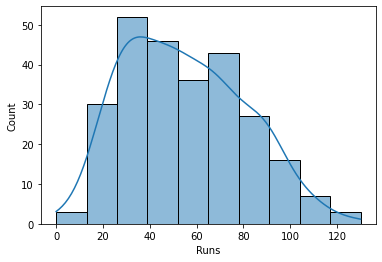

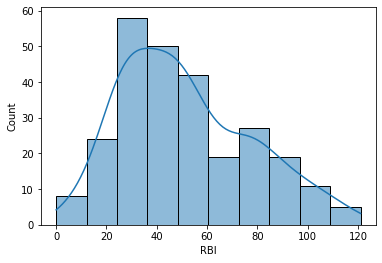

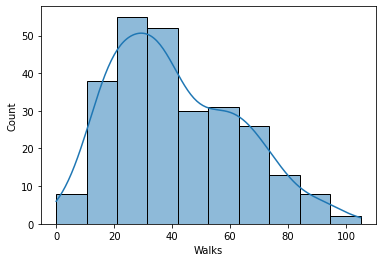

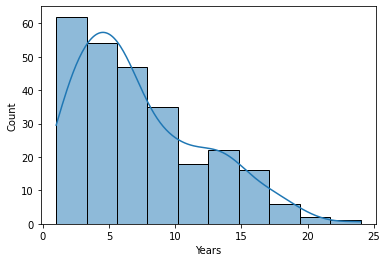

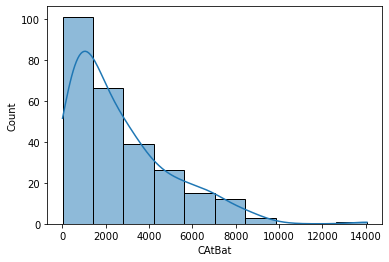

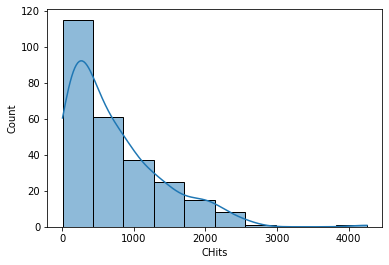

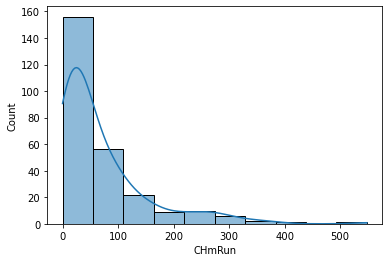

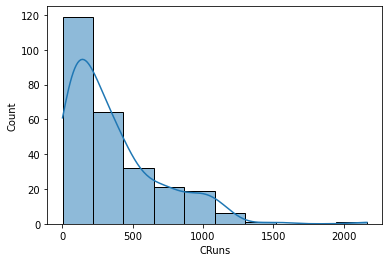

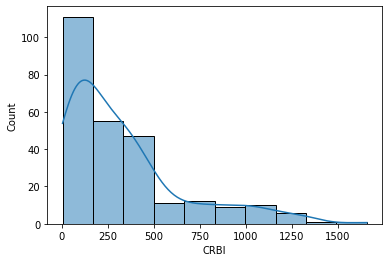

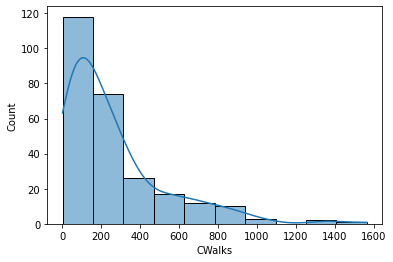

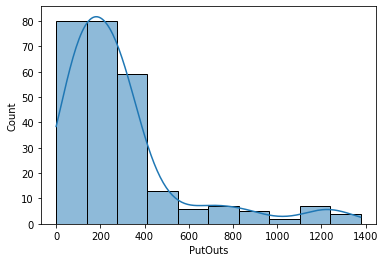

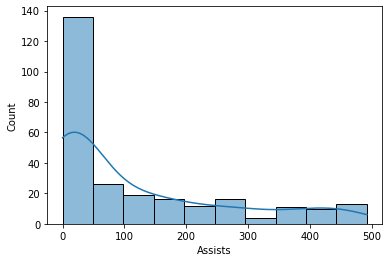

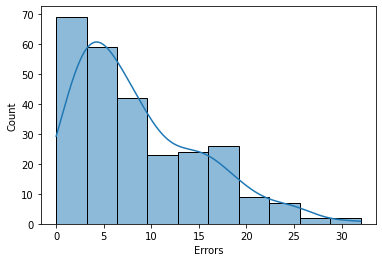

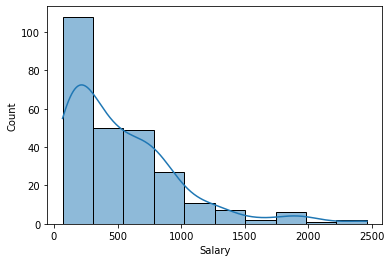

In [9]:
#Histogramas
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col], bins=10, kde=True)

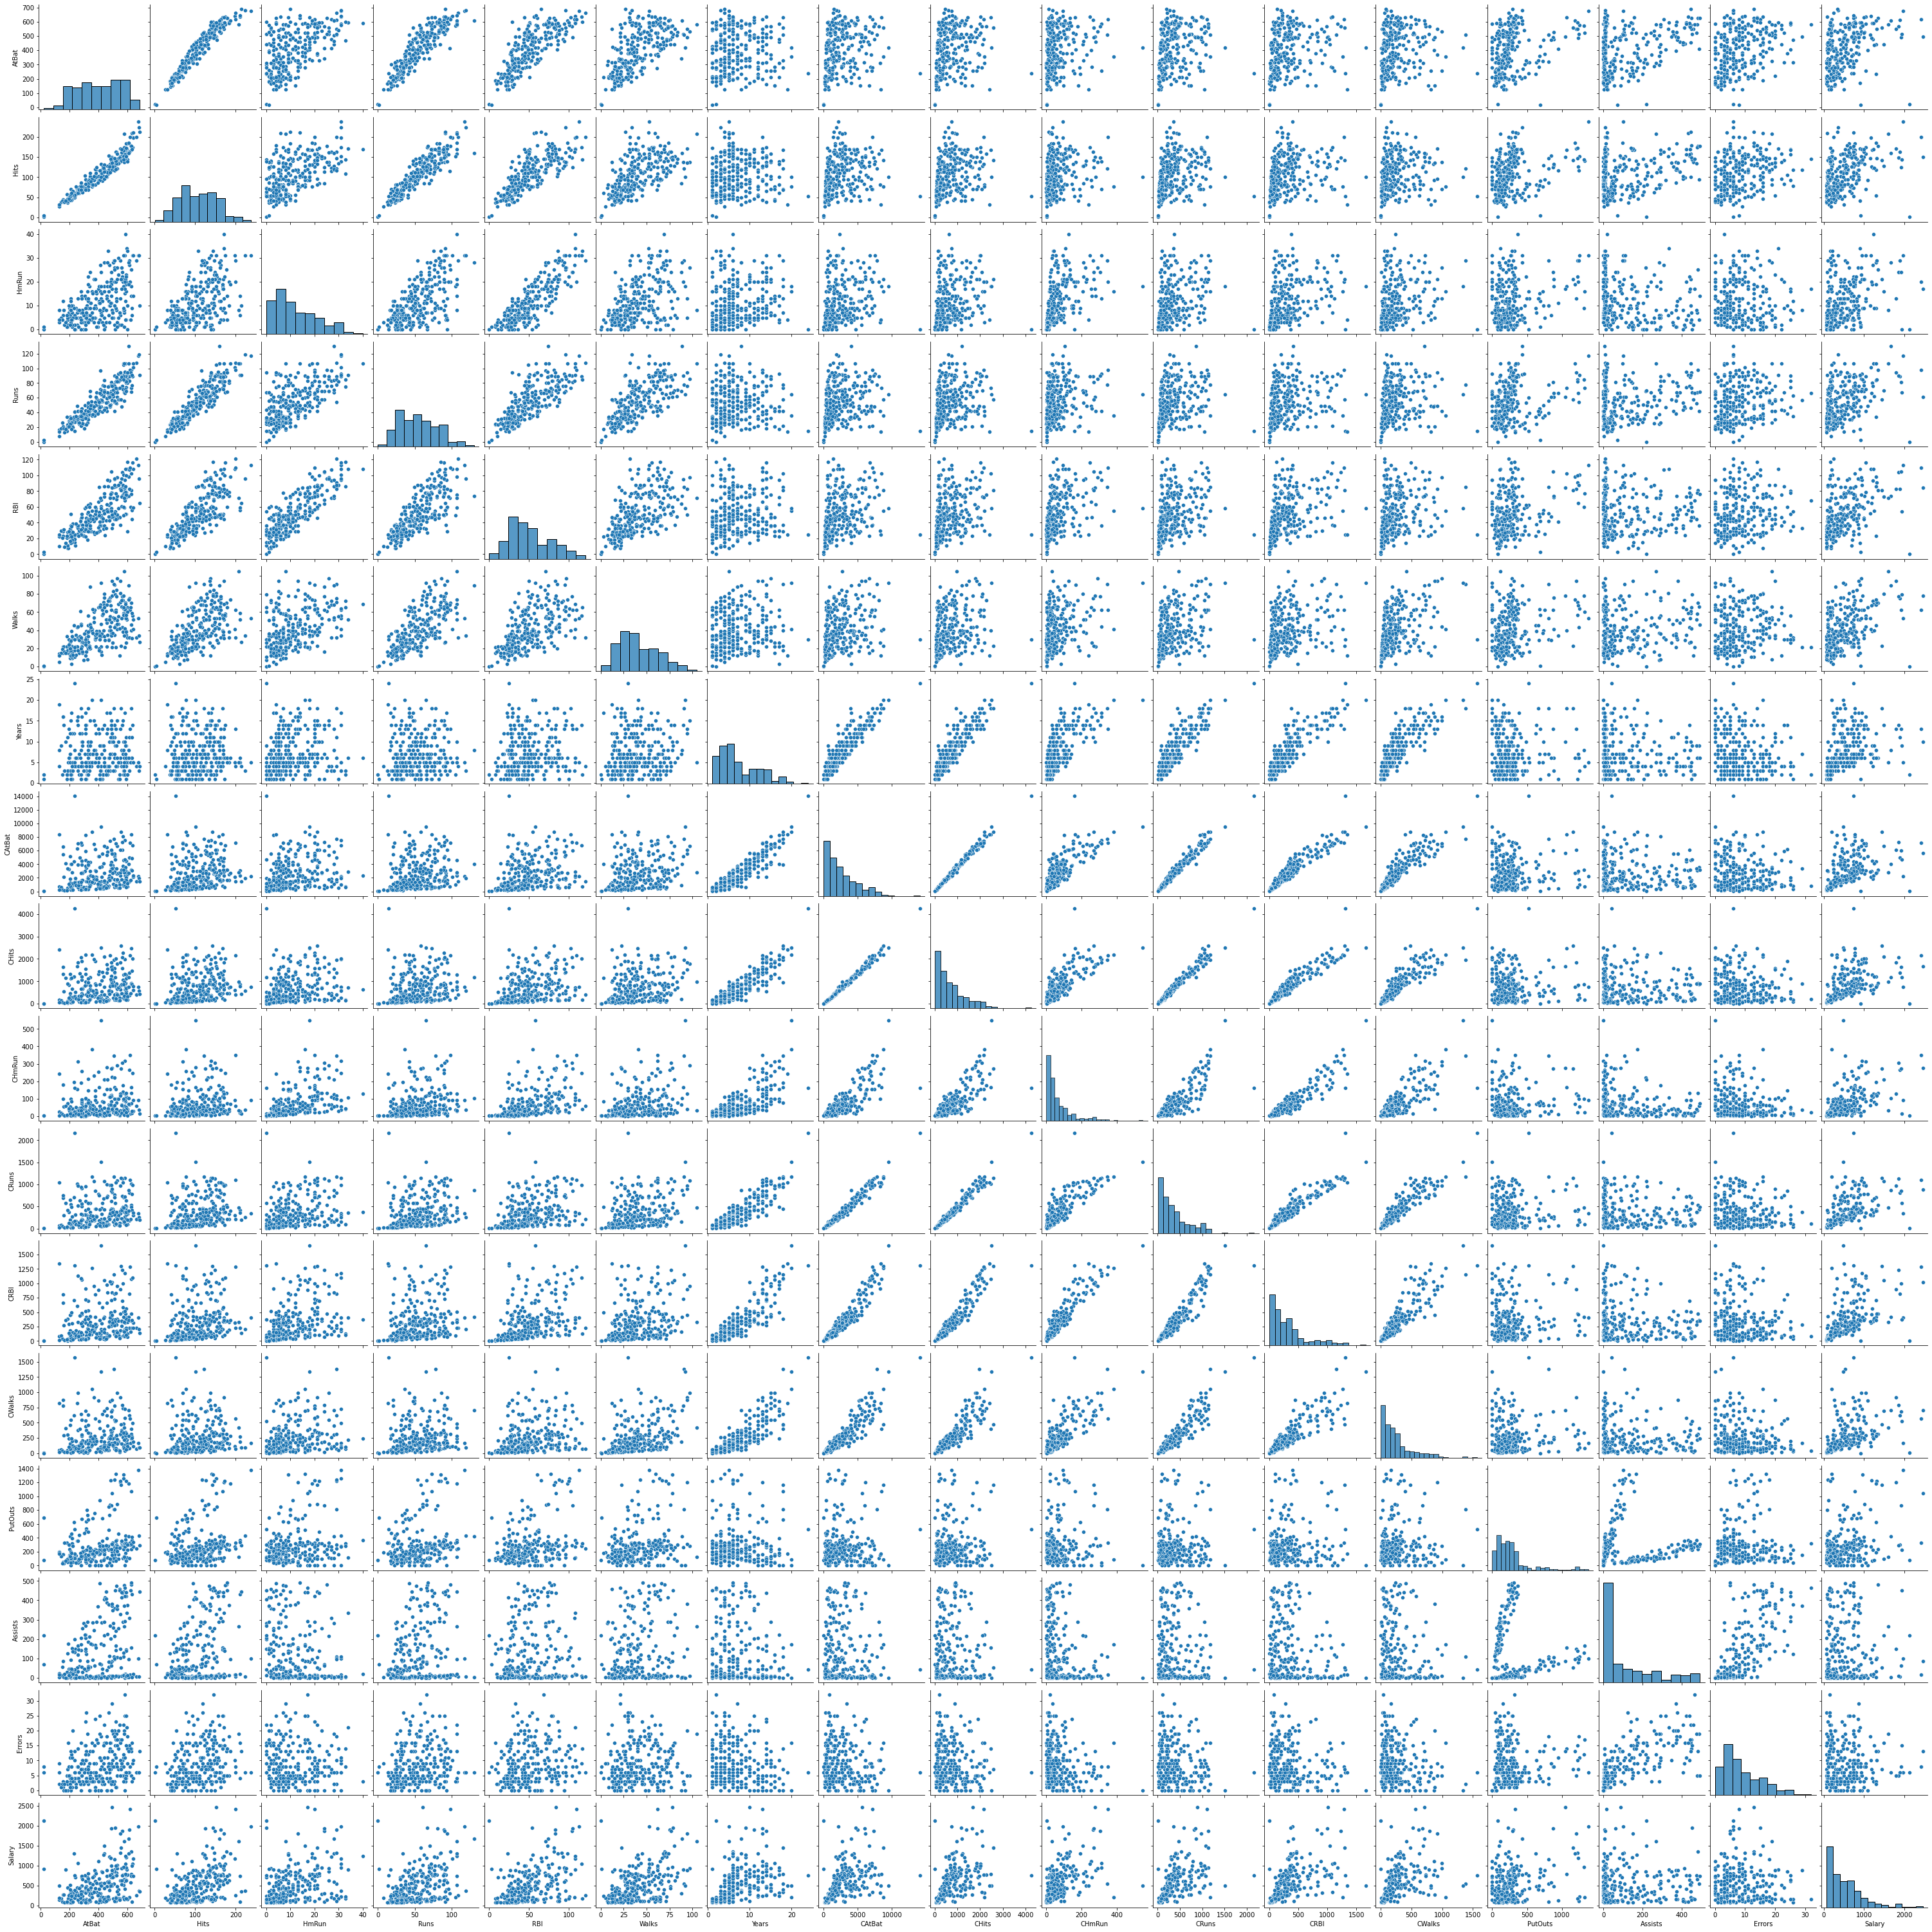

In [10]:
#Correlograma
sns.pairplot(df, kind='scatter')
plt.show()

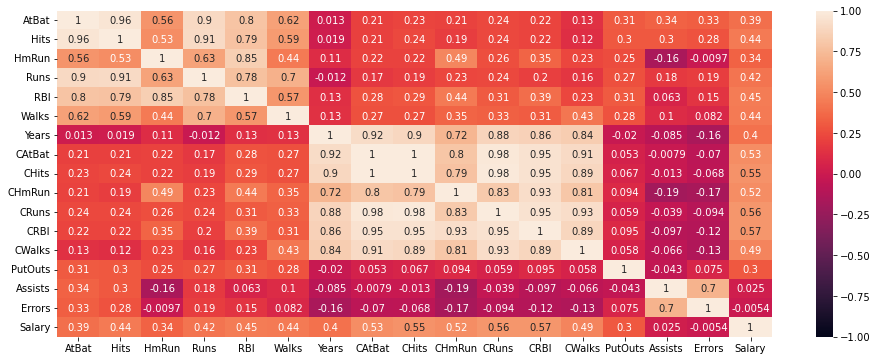

In [11]:
#Mapa de calor
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

La base de datos proporcionada para el ejercicio posee 16 variables (continuas) predictoras y una de respuesta (Salary). Las variables League, Division y New League se eliminan dado que son categóricas. De las 322 observaciones originales, se mantienen 263 que no tienen datos faltantes.

Los histogramas y estadísticas nos muestran que la variable AtBat tiene distribución uniforme, mientras que las demás tienen sesgo hacia la izquierda.

El correlograma nos enseña que para todos los pares entre las varialbes AtBat, Hits, HmRun, Runs, RBI y Walks la correlación es media con poca dispersión entre los puntos. Lo mismo sucede para el par Assists vs Errors.  Los demás pares de variables tienen correlación débil y dispersión nada despreciab le entre los puntos.

Finalmente, se agrega un mapa de calor para mostrar la correlación numérica entre cada par de variables, donde se confirma lo descrito anteriormente.

#### Carga de datos

In [12]:
XTotal, yTotal = datasets.load_breast_cancer(return_X_y=True)
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

### 2. Estimación de modelo SVM de clasificación (10 puntos)
Estimen un modelo de support vector machine sin kernel con la muestra de entrenamiento y calculen su poder predictivo evaluándolo en la muestra de test.

In [38]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

clf = SVC(kernel='linear',probability=True)
clf.fit(XTrain, yTrain)

predicciones=clf.predict(XTest)
prediccionesProb=clf.predict_proba(XTest)

#### Error de Predicción

In [39]:
#Error de predicción 
error = 0
for i in range(0, len(yTest)):
    if(yTest[i] != predicciones[i]):
        error += 1/len(yTest)
print("El error de predicción es "+str(round(error,6)))

El error de predicción es 0.042553


#### Matriz de Confusión

In [40]:
#Matriz de confusión
print("La matriz de confusión es ")
print(confusion_matrix(y_true = yTest, y_pred = predicciones))

La matriz de confusión es 
[[ 65   2]
 [  6 115]]


#### Accuracy

In [41]:
#Accuracy
accuracy = accuracy_score(y_true = yTest, y_pred = predicciones)
print('El Accuracy del modelo es '+str(round(accuracy,6)))

El Accuracy del modelo es 0.957447


#### Precisión

In [42]:
#Precisión
precision = precision_score(y_true = yTest, y_pred = predicciones)
print("La Precisión del modelo es "+str(round(precision,6)))

La Precisión del modelo es 0.982906


#### Curva ROC y AUC

Curva ROC y AUC:


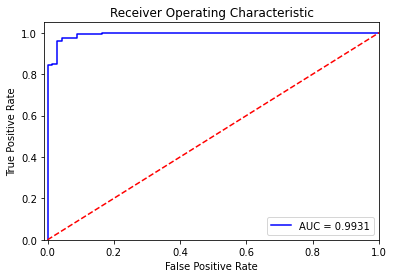

In [43]:
print('Curva ROC y AUC:')
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProb[:, 1], pos_label = 1)
AUC = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

### 3. Selección de variables usando métodos de envoltura e implementación de modelo de clasificación (20 puntos)
Realicen una selección de variables utilizando un algoritmo de envoltura y establezcan claramente las variables que se seleccionaron. Luego, calibren el modelo SVM únicamente con las variables seleccionadas y midan su desempeño en la muestra de evaluación.

Text(0, 0.5, 'RFE selection')

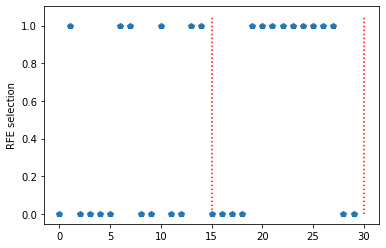

In [19]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

estimator = RandomForestRegressor()  #se usa random Forest como el algoritmo predictivo
selector = RFE(estimator, n_features_to_select=15, step=1) #Se define step=1, pero lo puede cambiar para que sea más rápido
selector = selector.fit(XTrain, yTrain) # esto puede tardar algunos minutos

selector.support_  #Conjunto de variables seleccionadas

plt.plot(selector.support_*1,'p')
plt.vlines(x=[15,30],ymin=0,ymax=1+0.05,ls=':',colors='r')
plt.ylabel('RFE selection')

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)

### 4. Selección de variables usando métodos de filtro e implementación de modelo de clasificación (20 puntos)
Realicen una selección de variables utilizando un método de filtro y establezcan claramente las variables que se seleccionaron. Luego, calibren el modelo SVM únicamente con las variables seleccionadas y midan su desempeño en la muestra de evaluación.

Text(0, 0.5, 'MI scores')

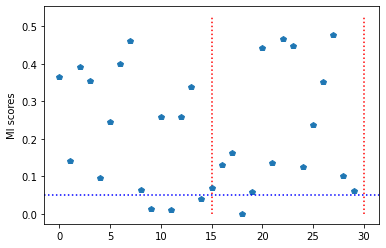

In [20]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####

mu_inf=mutual_info_regression(XTrain, yTrain,discrete_features=False,n_neighbors=9)

plt.plot(mu_inf,'p')
plt.vlines(x=[15,30],ymin=0,ymax=np.max(mu_inf)+0.05,ls=':',colors='r')
plt.axhline(y=0.05,ls=':',color='b')  #Threshold
plt.ylabel('MI scores')

Text(0, 0.5, 'F scores')

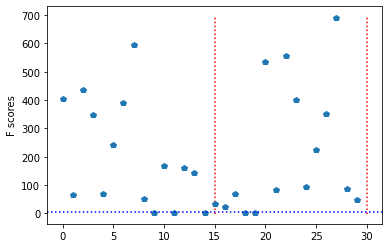

In [53]:
ftest=f_regression(XTrain, yTrain)

plt.plot(ftest[0],'p')
plt.vlines(x=[15,30],ymin=-2,ymax=np.max(ftest[0])+5,ls=':',colors='r')
plt.axhline(y=4,ls=':',color='b')  #Threshold en 4
plt.ylabel('F scores')

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 4)

### 5. Estimación de modelo SVM de clasificación con kernel polinomial (20 puntos)
Estimen un modelo de support vector machine con kernel polinomial con las variables escogidas en el punto 3 y evalúen su poder predictivo en la muestra de test.

In [21]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####

clf = SVC(kernel='poly',probability=True,degree=2)
clf.fit(XTrain, yTrain)

predicciones_Polin=clf.predict(XTest)
prediccionesProb_Polin=clf.predict_proba(XTest)

#### Error de Predicción

In [22]:
#Error de predicción 
error_Polin = 0
for i in range(0, len(yTest)):
    if(yTest[i] != predicciones_Polin[i]):
        error_Polin += 1/len(yTest)
print("El error de predicción es "+str(round(error_Polin,6)))

El error de predicción es 0.085106


#### Matriz de Confusión

In [23]:
#Matriz de confusión
print("La matriz de confusión es ")
print(confusion_matrix(y_true = yTest, y_pred = predicciones_Polin))

La matriz de confusión es 
[[ 52  15]
 [  1 120]]


#### Accuracy

In [24]:
#Accuracy
accuracy_Polin = accuracy_score(y_true = yTest, y_pred = predicciones_Polin)
print('El Accuracy del modelo es '+str(round(accuracy_Polin,6)))

El Accuracy del modelo es 0.914894


#### Precisión

In [25]:
#Precisión
precision_Polin = precision_score(y_true = yTest, y_pred = predicciones_Polin)
print("La Precisión del modelo es "+str(round(precision_Polin,6)))

La Precisión del modelo es 0.888889


#### Curva ROC y AUC

Curva ROC y AUC:


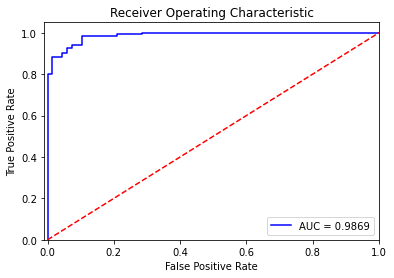

In [26]:
print('Curva ROC y AUC:')
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProb_Polin[:, 1], pos_label = 1)
AUC_Polin = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_Polin)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 5)

### 6. Estimación de modelo SVM de clasificación con kernel radial (20 puntos)
Estimen un modelo de support vector machine con kernel radial con las variables escogidas en el punto 4 y evalúen su poder predictivo en la muestra de test.

In [27]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 6 ####

clf = SVC(kernel='rbf',probability=True)
clf.fit(XTrain, yTrain)

predicciones_Rad=clf.predict(XTest)
prediccionesProb_Rad=clf.predict_proba(XTest)

#### Error de Predicción

In [28]:
#Error de predicción 
error_Rad = 0
for i in range(0, len(yTest)):
    if(yTest[i] != predicciones_Rad[i]):
        error_Rad += 1/len(yTest)
print("El error de predicción es "+str(round(error_Rad,6)))

El error de predicción es 0.074468


#### Matriz de Confusión

In [29]:
#Matriz de confusión
print("La matriz de confusión es ")
print(confusion_matrix(y_true = yTest, y_pred = predicciones_Rad))

La matriz de confusión es 
[[ 54  13]
 [  1 120]]


#### Accuracy

In [30]:
#Accuracy
accuracy_Rad = accuracy_score(y_true = yTest, y_pred = predicciones_Rad)
print('El Accuracy del modelo es '+str(round(accuracy_Rad,6)))

El Accuracy del modelo es 0.925532


#### Precisión

In [31]:
#Precisión
precision_Rad = precision_score(y_true = yTest, y_pred = predicciones_Rad)
print("La Precisión del modelo es "+str(round(precision_Rad,6)))

La Precisión del modelo es 0.902256


#### Curva ROC y AUC

Curva ROC y AUC:


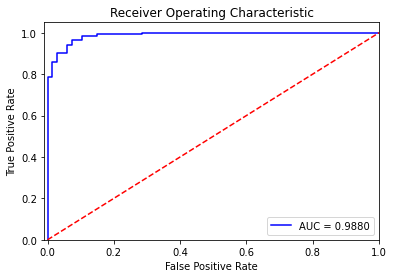

In [32]:
print('Curva ROC y AUC:')
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProb_Rad[:, 1], pos_label = 1)
AUC_Rad = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_Rad)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 6)

### 7. Elección del mejor modelo (5 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

#### Comparación Error de Clasificación

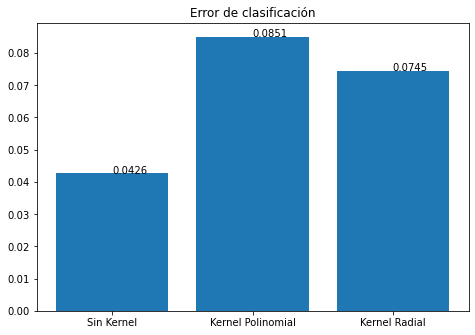

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Error de clasificación")
ejeX = ['Sin Kernel','Kernel Polinomial','Kernel Radial']
ejeY = [round(error,4),round(error_Polin,4),round(error_Rad,4)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

#### Comparación Accuracy

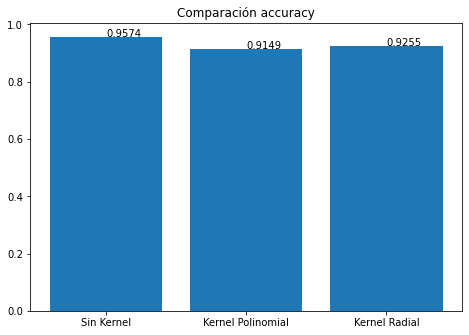

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación accuracy")
ejeX = ['Sin Kernel','Kernel Polinomial','Kernel Radial']
ejeY = [round(accuracy,4),round(accuracy_Polin,4),round(accuracy_Rad,4)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

#### Comparación Precision

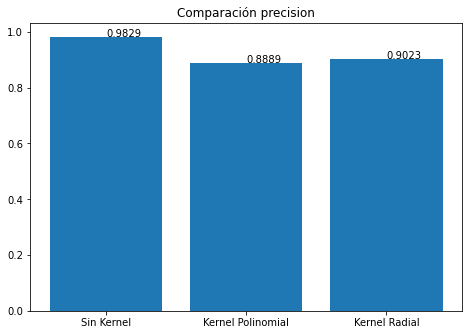

In [46]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación precision")
ejeX = ['Sin Kernel','Kernel Polinomial','Kernel Radial']
ejeY = [round(precision,4),round(precision_Polin,4),round(precision_Rad,4)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

#### Comparación AUC

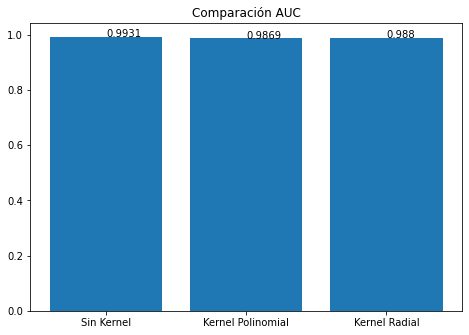

In [47]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación AUC")
ejeX = ['Sin Kernel','Kernel Polinomial','Kernel Radial']
ejeY = [round(AUC,4),round(AUC_Polin,4),round(AUC_Rad,4)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

(Utilicen este espacio para escribir su análisis y conclusiones sobre el punto 7)